# Importing Basic Libraries & Reading


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
pd.set_option('display.max_columns', None)  # To display all columns
pd.set_option('display.max_colwidth', None)  # To display full column width

In [59]:
x_train = pd.read_csv('X_Train_Data_Input.csv')
x_test = pd.read_csv('X_Test_Data_Input.csv')
y_train = pd.read_csv('Y_Train_Data_Target.csv')
y_test = pd.read_csv('Y_Test_Data_Target.csv')

In [60]:
# throughout this dataframe we have used df as training data and dt as testing data
#train dataframe
df = pd.concat([x_train, y_train.target], axis=1, join='inner') # both input and target column joined for easy analysis
#test dataframe
dt = pd.concat([x_test, y_test.target], axis=1, join='inner')

# Initial Analysis Of Dataset


In [61]:
df.isnull().sum() #checking for missing values

ID               0
Column0          9
Column1          0
Column2          0
Column3     126303
Column4     127710
Column5     167180
Column6       3850
Column7          0
Column8       3850
Column9     732137
Column10         0
Column11         0
Column12         0
Column13         0
Column14    365703
Column15     16456
Column16         0
Column17         0
Column18         0
Column19         0
Column20         0
Column21         0
target           0
dtype: int64

In [62]:
df =df.drop('Column9', axis =1) # we remove this column as it has lots of missing values
dt =dt.drop('Column9', axis =1)

In [63]:
df =df.drop('Column14', axis =1) # we remove this column as it has lots of missing values
dt =dt.drop('Column14', axis =1)

In [64]:
df =df.drop('ID', axis =1) # we remove this as this is not needed
dt =dt.drop('ID', axis =1)

In [65]:
df

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column10,Column11,Column12,Column13,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target
0,2.0,2495,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,0,0,0,0,0.00339,0.0,0,0.0,0,0,0,0
1,0.0,2495,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,0,0,0,0,0.00339,0.0,0,0.0,0,0,0,0
2,2.0,2495,4543.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,1,1,1,1,0.00339,0.0,0,0.0,0,0,0,0
3,0.0,211,59.0,NaN,NaN,NaN,-0.407939,-0.015607,-0.774979,0,0,0,0,0.00339,0.0,0,1.0,0,0,0,1
4,0.0,718,950.0,-2.028572,-1.855728,NaN,-0.407939,-0.015607,-0.774979,0,0,0,0,0.00339,0.0,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785128,0.0,304,1126.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,0,0,0,0,0.00339,0.0,0,1.0,0,0,0,0
785129,0.0,2495,2265.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.509591,1,1,1,1,0.00339,0.0,0,0.0,0,0,0,0
785130,0.0,2495,3760.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.218972,0,0,1,1,0.00339,0.0,0,0.0,0,0,0,0
785131,0.0,2480,4493.0,0.001462,0.062121,-0.007468,-0.407939,-0.015607,0.400071,1,1,1,1,0.00339,0.0,0,0.0,0,0,0,0


# Columns Segregation


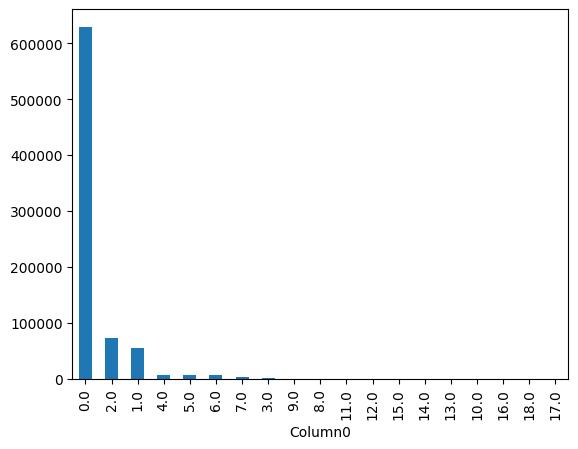

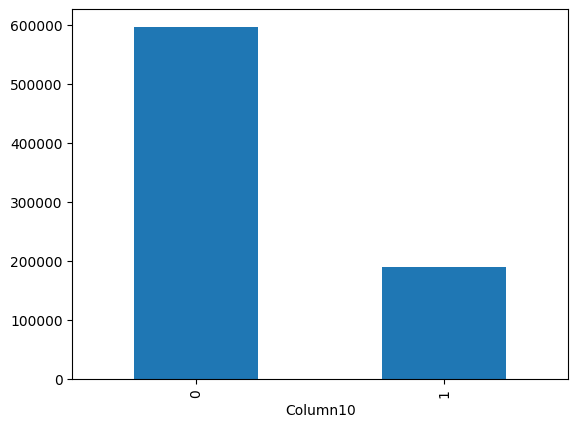

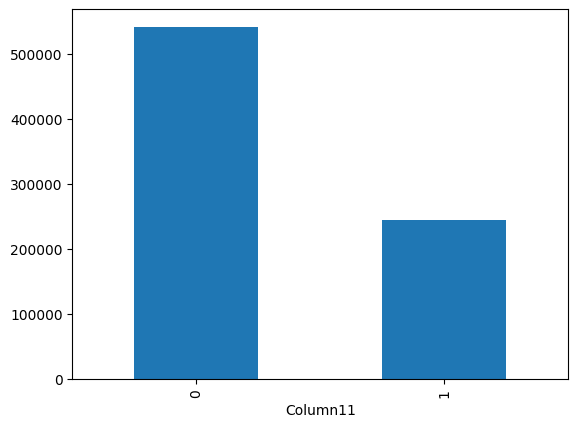

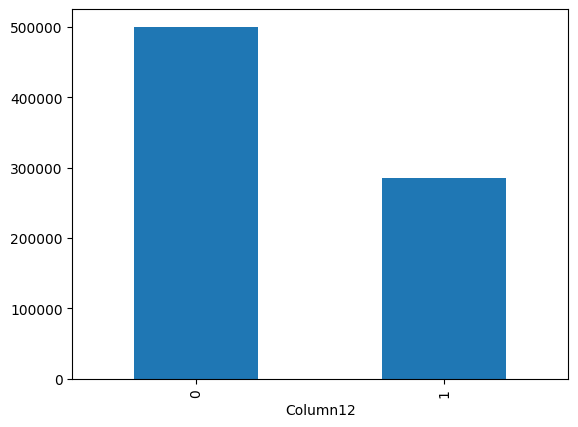

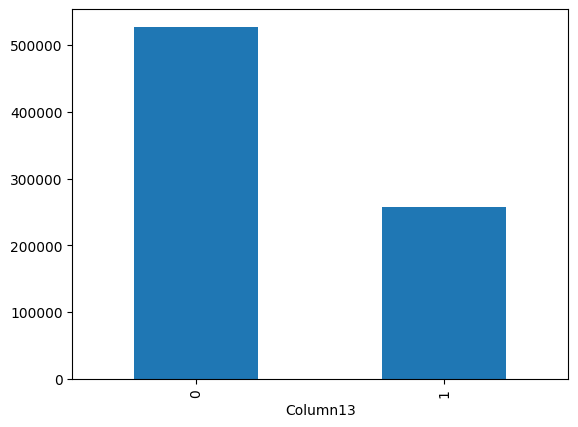

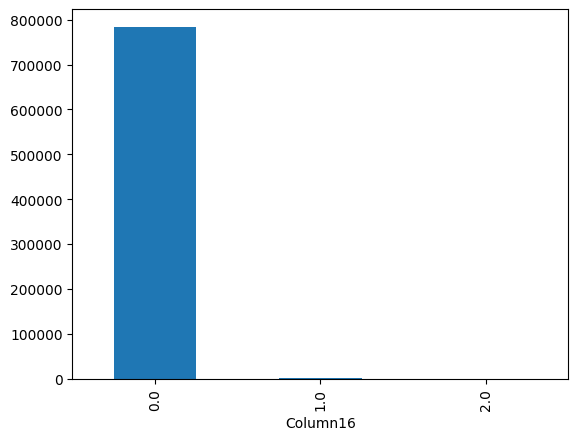

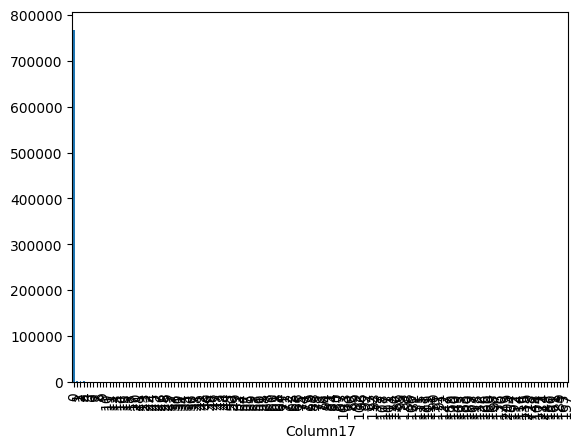

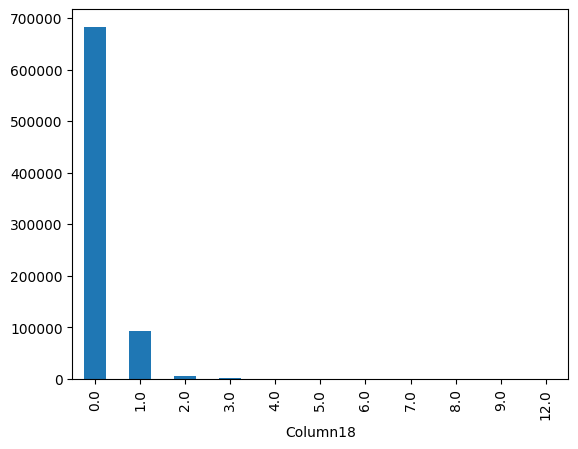

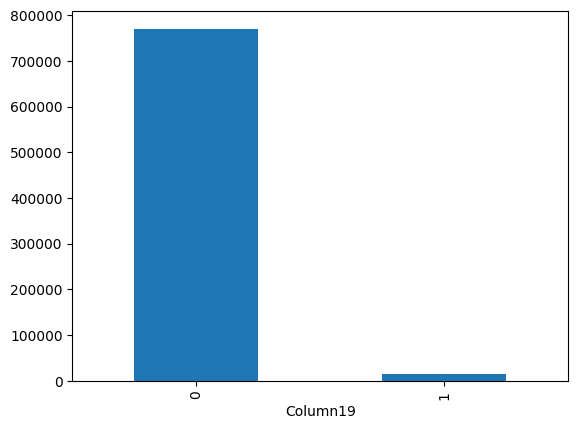

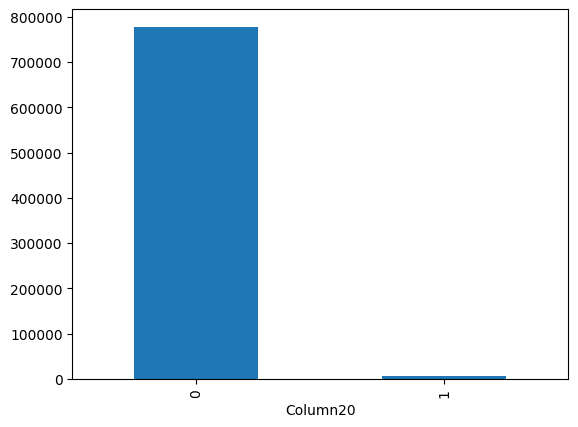

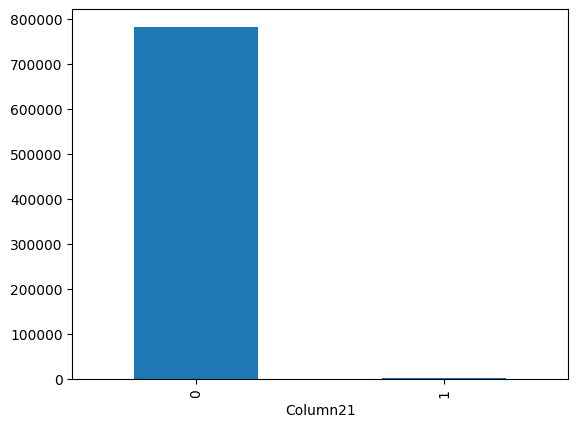

In [66]:
# we make an assumption that these cols could be categorical and to check the same we use graphs 
clname =['Column0','Column10','Column11','Column12','Column13','Column16','Column17','Column18','Column19','Column20','Column21']
for i in clname:
    counts = df[i].value_counts()
    counts.plot(kind='bar')
    plt.show()

In [67]:
#now confirmed that these are categorical cols 
CatCols= ['Column10','Column11','Column12','Column13','Column19','Column20','Column21']

In [68]:
df['Column16'].value_counts()

Column16
0.0    784190
1.0       939
2.0         4
Name: count, dtype: int64

In [69]:
cols=df.columns.tolist() 

In [70]:
cols.pop() # we dont want to include the target col

'target'

In [71]:
cols

['Column0',
 'Column1',
 'Column2',
 'Column3',
 'Column4',
 'Column5',
 'Column6',
 'Column7',
 'Column8',
 'Column10',
 'Column11',
 'Column12',
 'Column13',
 'Column15',
 'Column16',
 'Column17',
 'Column18',
 'Column19',
 'Column20',
 'Column21']

In [72]:
# these are numerical cols
NumCols= list(set(cols) - set(CatCols))

In [73]:
NumCols = sorted(NumCols, key=lambda x: int(x[6:])) # soring names of cols

In [74]:
NumCols

['Column0',
 'Column1',
 'Column2',
 'Column3',
 'Column4',
 'Column5',
 'Column6',
 'Column7',
 'Column8',
 'Column15',
 'Column16',
 'Column17',
 'Column18']

In [75]:
df['Column20'].value_counts() # confirming if it is categorical or not

Column20
0    777791
1      7342
Name: count, dtype: int64

# Data Imputation


In [76]:
# Trying to fill missing values in our data frame
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd

# Fit the imputer to our data
imputer = IterativeImputer(max_iter=10, random_state=0)
df_imp = imputer.fit_transform(df)  # This returns the imputed array

# Convert the imputed array back into a DataFrame
df_imp = pd.DataFrame(df_imp, columns=df.columns)


In [77]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd

# Fit the imputer to your data
imputer = IterativeImputer(max_iter=10, random_state=0)
dt_imp = imputer.fit_transform(dt)  # This returns the imputed array

# Convert the imputed array back into a DataFrame
dt_imp = pd.DataFrame(dt_imp, columns=dt.columns)


In [78]:
df_imp.isnull().sum() #cross verficiation

Column0     0
Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column10    0
Column11    0
Column12    0
Column13    0
Column15    0
Column16    0
Column17    0
Column18    0
Column19    0
Column20    0
Column21    0
target      0
dtype: int64

In [79]:
dt_imp.isnull().sum() #cross verification

Column0     0
Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column10    0
Column11    0
Column12    0
Column13    0
Column15    0
Column16    0
Column17    0
Column18    0
Column19    0
Column20    0
Column21    0
target      0
dtype: int64

# Outlier Detection


In [80]:
import pandas as pd
import numpy as np
from scipy import stats

# Specify the numerical columns
numerical_cols = NumCols

# Compute Z-scores , we use z score method for outlier detection
z_scores = stats.zscore(df[numerical_cols], nan_policy='omit')
abs_z_scores = np.abs(z_scores)

# Define a threshold for outliers
threshold = 3

# Identify rows where any column has a Z-score beyond the threshold
outlier_mask = (abs_z_scores > threshold).any(axis=1)

# Remove outliers
df_cleaned = df_imp[~outlier_mask]

# Check the shape of the cleaned DataFrame
print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)



Original shape: (785133, 21)
Cleaned shape: (704724, 21)


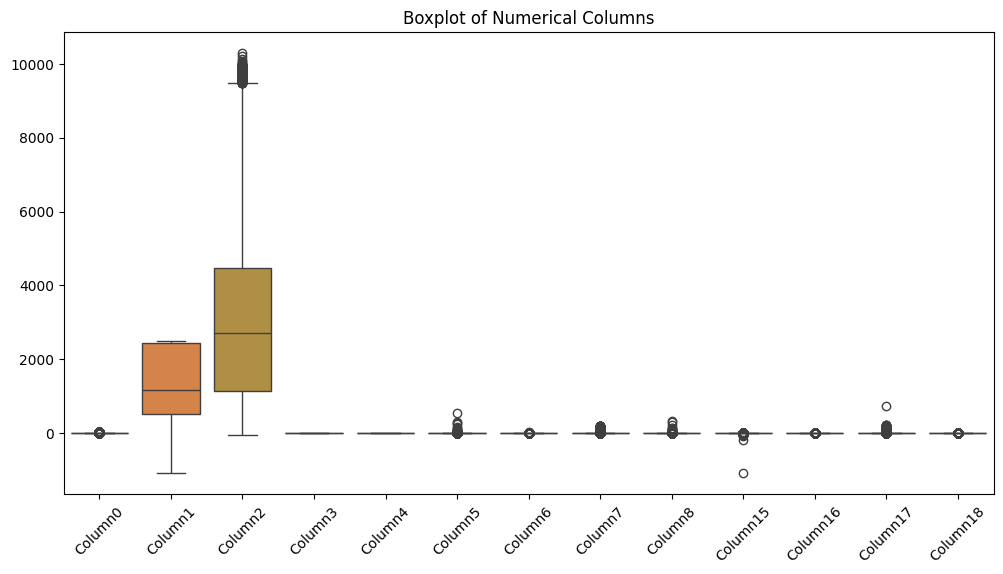

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplots for each numerical column
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplot of Numerical Columns")
plt.xticks(rotation=45)
plt.show()


In [87]:
import pandas as pd
import numpy as np
from scipy import stats

# Specify the numerical columns
numerical_cols = NumCols

# Compute Z-scores
z_scores = stats.zscore(dt[numerical_cols], nan_policy='omit')
abs_z_scores = np.abs(z_scores)

# Define a threshold for outliers
threshold = 3

# Identify rows where any column has a Z-score beyond the threshold
outlier_mask = (abs_z_scores > threshold).any(axis=1)

# Remove outliers
dt_cleaned = dt_imp[~outlier_mask]

# Check the shape of the cleaned DataFrame
print("Original shape:", dt.shape)
print("Cleaned shape:", dt_cleaned.shape)



Original shape: (261712, 21)
Cleaned shape: (234275, 21)


In [88]:
df_cleaned['Column16'].value_counts() # verifying if any value is lost 

Column16
0.0    704724
Name: count, dtype: int64

# Deletion and reorganising


In [89]:
df_cleaned=df_cleaned.drop('Column16',axis=1)
# removing those cols which arent required

In [90]:
dt_cleaned=dt_cleaned.drop('Column16',axis=1)

In [91]:
# assigning cleaned dataframe 
df = df_cleaned
dt = dt_cleaned

In [92]:
df

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column10,Column11,Column12,Column13,Column15,Column17,Column18,Column19,Column20,Column21,target
0,2.0,2495.0,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,0.0,0.0,0.0,0.0,0.00339,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2495.0,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,0.0,0.0,0.0,0.0,0.00339,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,2495.0,4543.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,1.0,1.0,1.0,1.0,0.00339,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,211.0,59.0,-0.130881,-0.369178,0.007627,-0.407939,-0.015607,-0.774979,0.0,0.0,0.0,0.0,0.00339,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,718.0,950.0,-2.028572,-1.855728,0.001614,-0.407939,-0.015607,-0.774979,0.0,0.0,0.0,0.0,0.00339,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785127,0.0,92.0,2450.0,-1.126335,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,0.0,0.0,0.0,0.0,0.00339,0.0,0.0,0.0,0.0,0.0,0.0
785128,0.0,304.0,1126.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,0.0,0.0,0.0,0.0,0.00339,0.0,1.0,0.0,0.0,0.0,0.0
785129,0.0,2495.0,2265.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.509591,1.0,1.0,1.0,1.0,0.00339,0.0,0.0,0.0,0.0,0.0,0.0
785130,0.0,2495.0,3760.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.218972,0.0,0.0,1.0,1.0,0.00339,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
dt

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column10,Column11,Column12,Column13,Column15,Column17,Column18,Column19,Column20,Column21,target
0,1.0,1986.0,53.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.554860,1.0,1.0,1.0,1.0,0.003390,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1579.0,12.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.142149,0.0,1.0,1.0,0.0,0.003390,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,898.0,3817.0,-2.028572,-1.855728,-0.009775,-0.407939,-0.015607,-0.774979,0.0,0.0,0.0,0.0,0.003390,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,79.0,3449.0,-0.675216,-0.577162,-0.007469,0.004020,-0.015607,0.635264,0.0,1.0,0.0,1.0,0.003390,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,646.0,6510.0,-2.028572,-1.855728,0.001613,-0.407939,-0.015434,-0.774979,1.0,1.0,1.0,1.0,0.003390,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261707,2.0,2495.0,4155.0,-2.028572,0.381762,-0.007468,-0.396521,-0.015607,0.454627,0.0,0.0,1.0,0.0,0.003391,0.0,0.0,0.0,0.0,0.0,0.0
261708,0.0,1.0,1178.0,-0.138854,-0.438493,-0.007469,-0.407939,-0.015607,-0.774979,0.0,0.0,0.0,0.0,0.003390,0.0,0.0,0.0,0.0,0.0,0.0
261709,0.0,1321.0,1356.0,0.678139,0.701403,-0.007468,-0.369193,-0.015607,0.912784,0.0,0.0,0.0,0.0,0.003390,0.0,0.0,0.0,0.0,0.0,0.0
261710,0.0,589.0,1731.0,-2.028572,-1.855728,-0.007578,-0.407939,-0.015607,-0.774979,0.0,0.0,0.0,0.0,0.003390,0.0,0.0,0.0,0.0,0.0,0.0


# Checking for Data Redundancy


In [94]:
df.corr() # checking correlation for redundancy 

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column10,Column11,Column12,Column13,Column15,Column17,Column18,Column19,Column20,Column21,target
Column0,1.000000,0.094756,-0.232399,0.082976,0.095891,0.005272,0.087474,0.033205,0.096177,0.072680,0.062865,0.055415,0.073202,0.000628,-0.020558,-0.046061,-0.021694,0.003990,-0.012757,-0.054779
Column1,0.094756,1.000000,0.224584,0.332158,0.461613,-0.023388,0.151704,0.021932,0.370579,0.141055,0.168439,0.237393,0.176612,0.024426,-0.139931,-0.356298,-0.138410,-0.085505,-0.051172,-0.350107
Column2,-0.232399,0.224584,1.000000,0.127949,0.134441,-0.034891,0.091138,0.025086,0.116658,-0.003146,-0.000573,0.019639,0.004168,0.006674,-0.046852,-0.103815,-0.049422,-0.056642,-0.028332,-0.102744
Column3,0.082976,0.332158,0.127949,1.000000,0.883182,-0.063245,0.083876,0.012929,0.328163,0.145100,0.164456,0.207145,0.167901,0.034462,-0.009894,-0.097157,-0.043894,-0.020385,-0.021182,-0.076029
Column4,0.095891,0.461613,0.134441,0.883182,1.000000,-0.058657,0.125253,0.014266,0.386472,0.164254,0.191861,0.248436,0.194546,0.048116,-0.032310,-0.140192,-0.054903,-0.003990,-0.010769,-0.127241
Column5,0.005272,-0.023388,-0.034891,-0.063245,-0.058657,1.000000,-0.019391,0.000643,-0.047058,0.002159,0.002961,-0.005227,-0.007481,-0.012781,-0.003620,0.028723,-0.001006,-0.006430,-0.003322,0.019456
Column6,0.087474,0.151704,0.091138,0.083876,0.125253,-0.019391,1.000000,0.021184,0.299461,-0.146623,-0.162000,-0.145433,-0.134439,-0.004323,-0.031646,-0.088109,-0.027466,-0.032396,-0.016469,-0.090434
Column7,0.033205,0.021932,0.025086,0.012929,0.014266,0.000643,0.021184,1.000000,0.009025,-0.004364,-0.005482,-0.006260,-0.004772,0.001009,-0.002420,0.012176,-0.002684,-0.002328,-0.001193,-0.006604
Column8,0.096177,0.370579,0.116658,0.328163,0.386472,-0.047058,0.299461,0.009025,1.000000,0.070873,0.160516,0.264899,0.196180,-0.026766,-0.030926,-0.158235,0.013903,0.075529,0.038265,-0.164709
Column10,0.072680,0.141055,-0.003146,0.145100,0.164254,0.002159,-0.146623,-0.004364,0.070873,1.000000,0.837957,0.740990,0.805971,0.005626,-0.035791,-0.089045,-0.044443,-0.031959,-0.022272,-0.094280


# Variance Inflation Factor


In [95]:
# checking VIF of the data this could help to identify potential redundant data
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

def calculate_vif(df):
    # Adding constant to include the intercept in the calculation
    X = add_constant(df)
    
    # Calculate VIF for each column
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return vif

# Calculate VIF for each column in the DataFrame
vif_df = calculate_vif(df)

# Filter columns with VIF > 10 (except for the constant column)
high_vif_cols = vif_df[vif_df["VIF"] > 10]["Variable"]

# Remove the constant column from the list
high_vif_cols = high_vif_cols[high_vif_cols != "const"]

# Drop those columns from the original DataFrame
df_reduced = df.drop(columns=high_vif_cols)

print(f"Columns removed due to high VIF: {list(high_vif_cols)}")
# we see that no col has VIF > 10 so none are potentitally redundant


Columns removed due to high VIF: []


In [96]:
#checking VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Add a constant column for intercept in the model
X = add_constant(df)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


    Variable       VIF
0      const  8.500616
1    Column0  1.108237
2    Column1  1.633521
3    Column2  1.151436
4    Column3  4.762823
5    Column4  5.467498
6    Column5  1.006841
7    Column6  1.202682
8    Column7  1.003939
9    Column8  1.508286
10  Column10  4.169753
11  Column11  4.611328
12  Column12  3.917617
13  Column13  4.400715
14  Column15  1.006117
15  Column17  1.134454
16  Column18  3.457267
17  Column19  1.149006
18  Column20  1.145057
19  Column21  1.097524
20    target  3.492461


# Feature Redcution (3types)


In [97]:
# we will make these dataframes exclusive of target col to do reduction
dff = df.drop("target",axis =1)
dtt = dt.drop('target',axis=1)

### Feature Agglomeration using KNN


In [98]:
#FEATURE REDUCTION METHOD 1 
import pandas as pd
from sklearn.cluster import FeatureAgglomeration

# Assuming dff is your original DataFrame
agglo = FeatureAgglomeration(n_clusters=14)

# Fit and transform the dataset
df_reduced = agglo.fit_transform(dff)

# Get the original column names
original_columns = dff.columns

# Get the cluster labels for each original feature
cluster_labels = agglo.labels_

# Create a DataFrame to map original features to clusters
feature_mapping = pd.DataFrame({
    'Original Feature': original_columns,
    'Cluster Label': cluster_labels
})

# Group by cluster label to see which original features belong to each cluster
grouped_features = feature_mapping.groupby('Cluster Label')['Original Feature'].apply(list).reset_index()

# Print the mapping of original features to clusters
print("Mapping of Original Features to Clusters:")
print(grouped_features)

# Convert the reduced array back into a DataFrame with meaningful column names
df_reduced = pd.DataFrame(df_reduced, columns=[f'Cluster_{i}' for i in range(14)])

# Print shapes
print(f"Original shape: {dff.shape}")
print(f"Reduced shape: {df_reduced.shape}")

# Optionally, view the reduced DataFrame
print("Reduced DataFrame:")
df_reduced



Mapping of Original Features to Clusters:
    Cluster Label                                            Original Feature
0               0  [Column5, Column7, Column15, Column19, Column20, Column21]
1               1                                                  [Column18]
2               2                                                  [Column13]
3               3                                                  [Column17]
4               4                                                  [Column11]
5               5                                                  [Column12]
6               6                                                  [Column10]
7               7                                                   [Column2]
8               8                                                   [Column6]
9               9                                                   [Column3]
10             10                                                   [Column4]
11             11     

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,Cluster_10,Cluster_11,Cluster_12,Cluster_13
0,-0.003280,0.0,0.0,0.0,0.0,0.0,0.0,3726.0,0.434190,0.678139,0.701403,2495.0,0.606265,2.0
1,-0.003275,0.0,0.0,0.0,0.0,0.0,0.0,3454.0,1.554998,0.452580,0.701403,2495.0,0.329946,0.0
2,-0.003281,0.0,1.0,0.0,1.0,1.0,1.0,4543.0,-0.407939,-1.577453,-1.429540,2495.0,-0.774979,2.0
3,-0.000765,1.0,0.0,0.0,0.0,0.0,0.0,59.0,-0.407939,-0.130881,-0.369178,211.0,-0.774979,0.0
4,-0.001767,0.0,0.0,0.0,0.0,0.0,0.0,950.0,-0.407939,-2.028572,-1.855728,718.0,-0.774979,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704719,-0.003281,0.0,0.0,0.0,0.0,0.0,0.0,2450.0,-0.407939,-1.126335,0.701403,92.0,-0.774979,0.0
704720,-0.003281,1.0,0.0,0.0,0.0,0.0,0.0,1126.0,-0.407939,0.678139,0.701403,304.0,-0.774979,0.0
704721,-0.003281,0.0,1.0,0.0,1.0,1.0,1.0,2265.0,-0.407939,0.678139,0.701403,2495.0,0.509591,0.0
704722,-0.003281,0.0,1.0,0.0,0.0,1.0,0.0,3760.0,-0.407939,0.678139,0.701403,2495.0,0.218972,0.0


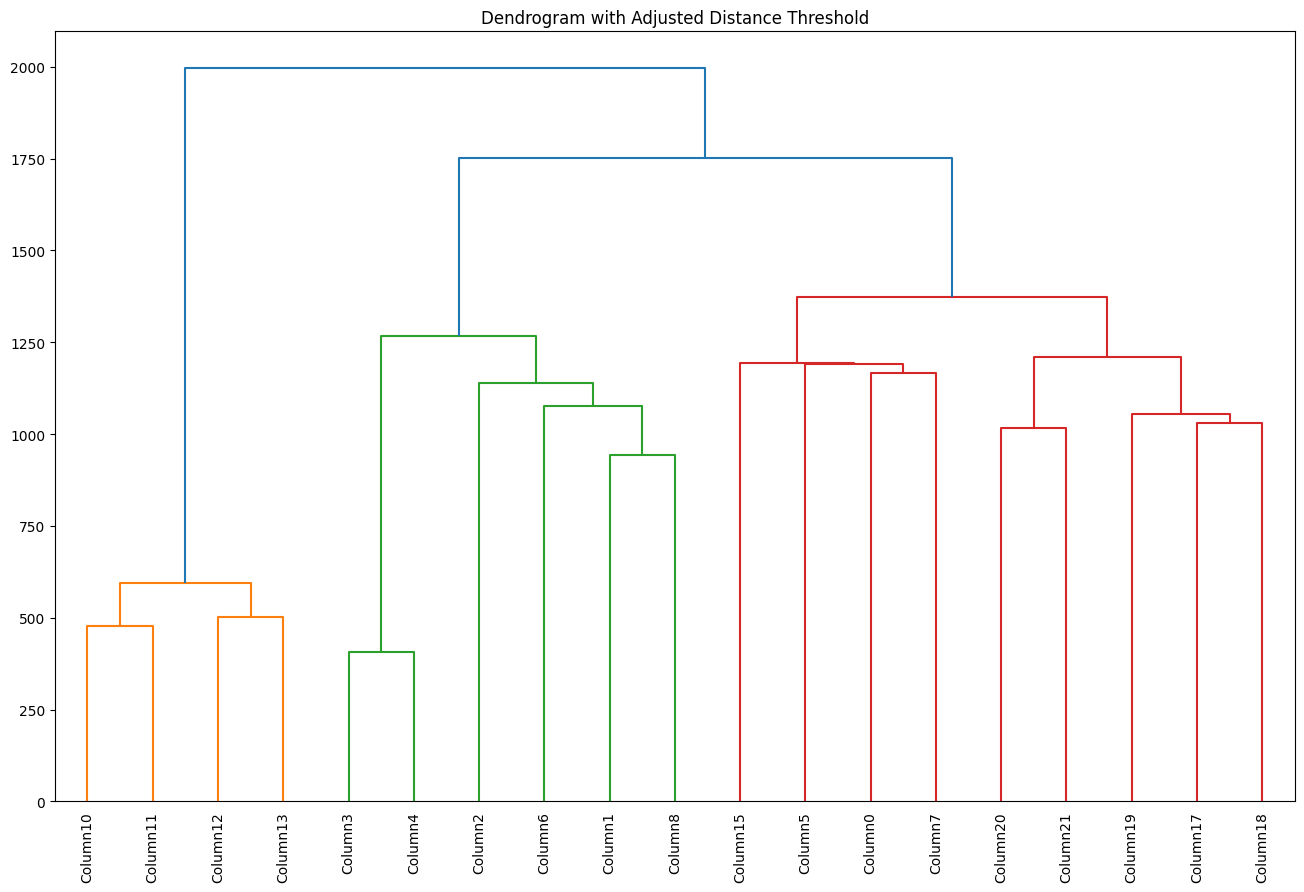

In [104]:
#visualisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dff_scaled = scaler.fit_transform(dff)

# Perform linkage again
linked = linkage(dff_scaled.T, method='ward')
plt.figure(figsize=(16, 10))
dendrogram(linked, labels=original_columns, orientation='top', leaf_rotation=90, leaf_font_size=10, color_threshold=1500) 
plt.title('Dendrogram with Adjusted Distance Threshold')
plt.show()



In [106]:
#FEATURE REDUCTION METHOD 1 
import pandas as pd
from sklearn.cluster import FeatureAgglomeration

# Assuming dff is your original DataFrame
agglo = FeatureAgglomeration(n_clusters=14)

# Fit and transform the dataset
dt_reduced = agglo.fit_transform(dtt)

# Get the original column names
original_columns = dtt.columns

# Get the cluster labels for each original feature
cluster_labels = agglo.labels_

# Create a DataFrame to map original features to clusters
feature_mapping = pd.DataFrame({
    'Original Feature': original_columns,
    'Cluster Label': cluster_labels
})

# Group by cluster label to see which original features belong to each cluster
grouped_features = feature_mapping.groupby('Cluster Label')['Original Feature'].apply(list).reset_index()

# Print the mapping of original features to clusters
print("Mapping of Original Features to Clusters:")
print(grouped_features)

# Convert the reduced array back into a DataFrame with meaningful column names
dt_reduced = pd.DataFrame(dt_reduced, columns=[f'Cluster_{i}' for i in range(14)])

# Print shapes
print(f"Original shape: {dtt.shape}")
print(f"Reduced shape: {dt_reduced.shape}")

# Optionally, view the reduced DataFrame
print("Reduced DataFrame:")
dt_reduced



Mapping of Original Features to Clusters:
    Cluster Label                                            Original Feature
0               0  [Column5, Column7, Column15, Column19, Column20, Column21]
1               1                                                  [Column18]
2               2                                                  [Column13]
3               3                                                  [Column17]
4               4                                                  [Column11]
5               5                                                  [Column12]
6               6                                                  [Column10]
7               7                                                   [Column2]
8               8                                                   [Column6]
9               9                                                   [Column3]
10             10                                                   [Column4]
11             11     

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,Cluster_10,Cluster_11,Cluster_12,Cluster_13
0,-0.003281,0.0,1.0,0.0,1.0,1.0,1.0,53.0,-0.407939,0.678139,0.701403,1986.0,0.554860,1.0
1,-0.003281,0.0,0.0,0.0,1.0,1.0,0.0,12.0,-0.407939,0.678139,0.701403,1579.0,0.142149,2.0
2,-0.003665,0.0,0.0,0.0,0.0,0.0,0.0,3817.0,-0.407939,-2.028572,-1.855728,898.0,-0.774979,0.0
3,-0.003281,0.0,1.0,0.0,1.0,0.0,0.0,3449.0,0.004020,-0.675216,-0.577162,79.0,0.635264,0.0
4,-0.001738,0.0,1.0,0.0,1.0,1.0,1.0,6510.0,-0.407939,-2.028572,-1.855728,646.0,-0.774979,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234270,-0.003281,0.0,0.0,0.0,0.0,1.0,0.0,4155.0,-0.396521,-2.028572,0.381762,2495.0,0.454627,2.0
234271,-0.003281,0.0,0.0,0.0,0.0,0.0,0.0,1178.0,-0.407939,-0.138854,-0.438493,1.0,-0.774979,0.0
234272,-0.003281,0.0,0.0,0.0,0.0,0.0,0.0,1356.0,-0.369193,0.678139,0.701403,1321.0,0.912784,0.0
234273,-0.003299,0.0,0.0,0.0,0.0,0.0,0.0,1731.0,-0.407939,-2.028572,-1.855728,589.0,-0.774979,0.0


### Feature reduction using correlation


In [108]:
#FEATURE REDUCTION METHOD 2
target_col = 'target'

# Compute the correlation matrix
correlation_matrix = df.corr()

# Get the correlation values for the target column
corr_with_target = correlation_matrix[target_col]

# Filter columns with absolute correlation greater than or equal to 0.1
filtered_columns = corr_with_target[abs(corr_with_target) >= 0.1].index

# Create a new DataFrame with the filtered columns (including the target column)
filtered_df = df[filtered_columns].drop('target',axis=1)

filtered_df


,Column1,Column2,Column4,Column8,Column12,Column13,Column17,Column18,Column19,Column20,Column21
0,2495.0,3726.0,0.701403,0.606265,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2495.0,3454.0,0.701403,0.329946,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2495.0,4543.0,-1.429540,-0.774979,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,211.0,59.0,-0.369178,-0.774979,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,718.0,950.0,-1.855728,-0.774979,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
785127,92.0,2450.0,0.701403,-0.774979,0.0,0.0,0.0,0.0,0.0,0.0,0.0
785128,304.0,1126.0,0.701403,-0.774979,0.0,0.0,0.0,1.0,0.0,0.0,0.0
785129,2495.0,2265.0,0.701403,0.509591,1.0,1.0,0.0,0.0,0.0,0.0,0.0
785130,2495.0,3760.0,0.701403,0.218972,1.0,1.0,0.0,0.0,0.0,0.0,0.0


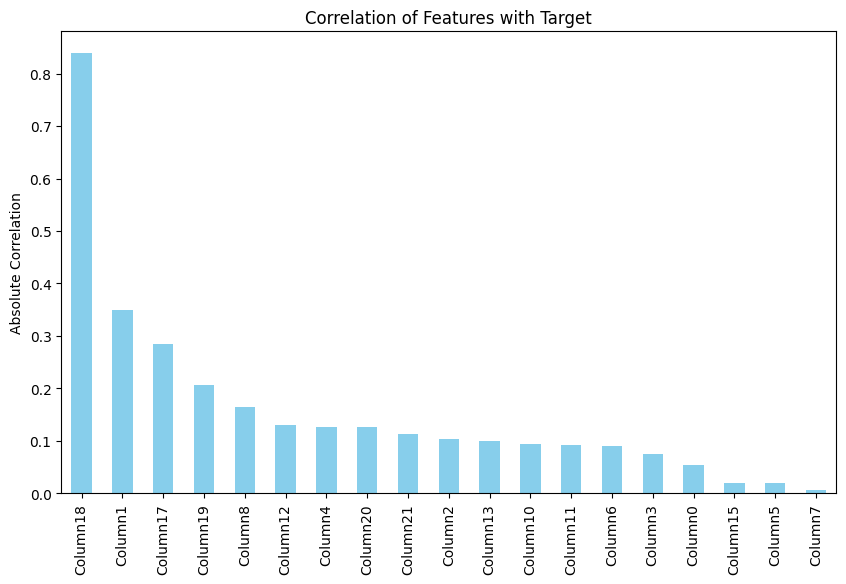

In [109]:
#visualisation
# Bar plot to show correlation with the target variable
plt.figure(figsize=(10, 6))
corr_with_target.drop('target').abs().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Target')
plt.ylabel('Absolute Correlation')
plt.show()


In [110]:
#FEATURE REDUCTION METHOD 2
target_col = 'target'

# Compute the correlation matrix
correlation_matrix = dt.corr()

# Get the correlation values for the target column
corr_with_target = correlation_matrix[target_col]

# Filter columns with absolute correlation greater than or equal to 0.1
filtered_columns = corr_with_target[abs(corr_with_target) >= 0.1].index

# Create a new DataFrame with the filtered columns (including the target column)
filtered_dt = dt[filtered_columns].drop('target',axis=1)

filtered_dt

,Column1,Column2,Column4,Column8,Column12,Column13,Column17,Column18,Column19,Column20,Column21
0,1986.0,53.0,0.701403,0.554860,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1579.0,12.0,0.701403,0.142149,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,898.0,3817.0,-1.855728,-0.774979,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,79.0,3449.0,-0.577162,0.635264,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,646.0,6510.0,-1.855728,-0.774979,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
261707,2495.0,4155.0,0.381762,0.454627,1.0,0.0,0.0,0.0,0.0,0.0,0.0
261708,1.0,1178.0,-0.438493,-0.774979,0.0,0.0,0.0,0.0,0.0,0.0,0.0
261709,1321.0,1356.0,0.701403,0.912784,0.0,0.0,0.0,0.0,0.0,0.0,0.0
261710,589.0,1731.0,-1.855728,-0.774979,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Principal Component Analysis


In [111]:
#FEATURE REDUCTION METHOD 3
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is called 'df' and you want to exclude the target column
# Separate features and target
X = dff  # Drop the target column

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA to extract the top 14 components
no_comp =14
pca = PCA(n_components=no_comp)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Convert the PCA result back into a DataFrame
pca_columns = [f'PC{i+1}' for i in range(no_comp)]  # Name the components PC1, PC2, ..., PC14
df_pca = pd.DataFrame(X_pca, columns=pca_columns)

# View the new DataFrame with the PCA components
df_pca


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-0.064019,-2.635876,0.383683,2.008217,0.095446,0.206506,0.000366,-0.172604,-0.274891,0.378332,0.623951,-1.444288,-0.635553,-0.082082
1,-0.463937,-2.839841,0.195193,0.092949,0.801411,0.840023,-0.132444,-0.247359,-0.848914,-0.767521,-0.146644,0.522318,-0.053737,0.939027
2,2.075567,2.155439,-1.382897,1.392651,1.170215,0.259456,0.380957,-0.613242,-0.596289,0.931680,1.188206,-2.401561,-0.856702,0.042886
3,-2.258758,1.275351,0.707426,0.383281,-1.472238,-0.157502,-0.019463,0.631160,0.418108,-1.596222,-0.697339,0.300322,-0.231765,-0.737737
4,-2.623241,1.687594,-1.352521,0.374858,0.799767,-0.107429,0.032965,-0.131065,-0.293834,0.445097,0.149795,0.486489,0.476817,-0.101590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704719,-1.749632,0.290322,-0.448356,-0.183303,-0.430293,-0.488006,-0.028628,0.012835,0.338964,0.040729,-0.121236,0.402641,0.051076,0.623664
704720,-1.666068,0.306623,1.175577,-0.043951,-2.088069,-0.399237,-0.054053,0.408633,0.847124,-1.688402,-0.729730,0.129709,-0.475561,-0.444356
704721,3.365898,0.198616,0.004779,-0.232431,-0.030380,-0.143262,-0.068825,0.070575,0.054959,0.179433,0.011876,0.526971,0.321378,-0.244024
704722,1.466301,-1.004560,0.018034,-0.654192,-0.094107,-0.238824,-0.042858,0.196408,0.169928,0.469181,0.158798,0.122992,0.287191,-0.558197


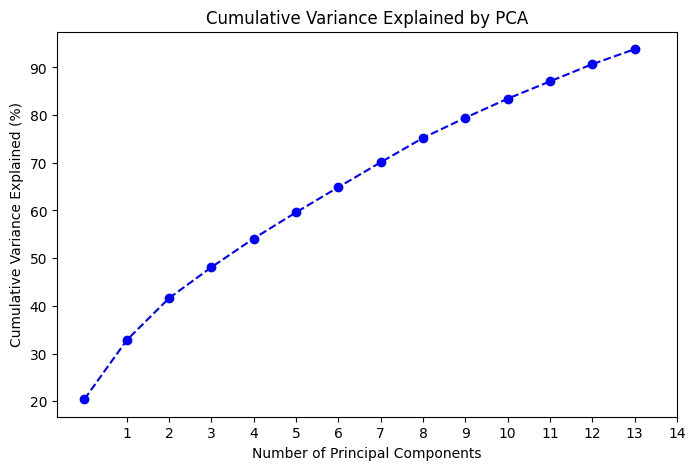

In [113]:
# Cumulative explained variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100), marker='o', linestyle='--', color='b')
plt.xticks(np.arange(1, no_comp + 1, step=1))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.title('Cumulative Variance Explained by PCA')
plt.show()


In [40]:
#FEATURE REDUCTION METHOD 3
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is called 'df' and you want to exclude the target column
# Separate features and target
X = dtt  # Drop the target column

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA to extract the top 14 components
no_comp =14
pca = PCA(n_components=no_comp)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Convert the PCA result back into a DataFrame
pca_columns = [f'PC{i+1}' for i in range(no_comp)]  # Name the components PC1, PC2, ..., PC14
dt_pca = pd.DataFrame(X_pca, columns=pca_columns)

# View the new DataFrame with the PCA components
dt_pca


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-3.313917,-0.508101,0.216138,1.551084,-0.428961,-0.323957,-0.094703,-0.163690,-0.196029,0.165527,0.100256,0.360429,0.131831,-0.223130
1,-1.346371,0.362860,0.353229,2.703900,-0.918004,-0.509704,-0.153837,-0.089411,-0.415332,0.481037,0.446883,-0.500815,-0.166168,-0.278171
2,2.491923,-1.324238,-1.482024,-0.493694,0.993695,-0.276973,0.329252,-0.190117,0.382600,0.431283,0.363458,-0.332893,0.160136,-0.072768
3,-0.208896,-0.865973,-0.334838,-0.228014,0.842874,0.209519,0.246692,-0.425203,0.403441,-0.527175,-0.496337,0.396666,0.155264,0.010877
4,-1.302781,-3.160120,-1.650426,-0.192018,1.448518,0.168005,0.645441,-0.192225,0.984156,0.087846,0.506916,-1.953780,-0.630822,0.511926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234270,-0.041727,0.568358,-0.568495,1.696483,0.926129,-0.319182,0.409130,-0.394745,0.474875,1.033374,1.091699,-1.946965,-0.104452,-1.353205
234271,1.874036,-0.558868,-0.437290,0.169677,-0.659538,-0.351608,-0.256976,0.199156,-0.403023,-0.010780,-0.213420,0.760429,0.097783,0.679308
234272,0.524057,1.497439,0.422200,0.216002,-0.449825,-0.196982,-0.369893,0.082773,-0.409341,0.213616,-0.206559,1.021571,0.508171,-0.621727
234273,2.624633,-1.651751,-1.385246,0.131080,0.751265,-0.367459,0.203585,-0.212290,0.279210,0.359729,0.193564,0.311145,0.347129,-0.049437


# Model Training (Random Forest Classifier)


In [41]:
# # using all 3 feature reduction dataframes to see which is best
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Initialize the Random Forest Classifier
# rf = RandomForestClassifier(random_state=42)

# # Function to train and evaluate the model
# def train_and_evaluate(X_train, y_train, X_test, y_test, df_type):
#     # Train the model on the training data
#     rf.fit(X_train, y_train)
    
#     # Make predictions on the test data
#     y_pred = rf.predict(X_test)

#     # Calculate evaluation metrics
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred, average='binary')
#     recall = recall_score(y_test, y_pred, average='binary')
#     f1 = f1_score(y_test, y_pred, average='binary')

#     # Print the results
#     print(f"Results for {df_type}:")
#     print(f"Accuracy: {accuracy:.4f}")
#     print(f"Precision: {precision:.4f}")
#     print(f"Recall: {recall:.4f}")
#     print(f"F1 Score: {f1:.4f}")
#     print("-" * 30)

# # 1. Using df_reduced and dt_reduced
# X_train_reduced = df_reduced  # X_train
# y_train_reduced = df['target']  # y_train
# X_test_reduced = dt_reduced  # X_test
# y_test_reduced = dt['target']  # y_test
# train_and_evaluate(X_train_reduced, y_train_reduced, X_test_reduced, y_test_reduced, "df_reduced")

# # 2. Using filtered_df and filtered_dt
# X_train_filtered = filtered_df  # X_train
# y_train_filtered = df['target']  # y_train
# X_test_filtered = filtered_dt  # X_test
# y_test_filtered = dt['target']  # y_test
# train_and_evaluate(X_train_filtered, y_train_filtered, X_test_filtered, y_test_filtered, "filtered_df")

# # 3. Using df_pca and dt_pca
# X_train_pca = df_pca  # X_train
# y_train_pca = df['target']  # y_train
# X_test_pca = dt_pca  # X_test
# y_test_pca = dt['target']  # y_test
# train_and_evaluate(X_train_pca, y_train_pca, X_test_pca, y_test_pca, "df_pca")


Results for df_reduced:
Accuracy: 0.9805
Precision: 0.8901
Recall: 0.8857
F1 Score: 0.8879
------------------------------
Results for filtered_df:
Accuracy: 0.9798
Precision: 0.8634
Recall: 0.9114
F1 Score: 0.8868
------------------------------
Results for df_pca:
Accuracy: 0.9212
Precision: 0.7062
Recall: 0.1618
F1 Score: 0.2633
------------------------------


- VISUALISATION of random forest classifier by converting dataset into 2d using pca then retraining and plotting , this is just used for the sake of visualisation not using this as result


In [114]:
# import numpy as np
# from sklearn.decomposition import PCA

# # Reduce the data to 2 components using PCA for visualization
# pca_vis = PCA(n_components=2)

# # Apply PCA to each feature-reduced dataset
# X_train_reduced_2d = pca_vis.fit_transform(X_train_reduced)
# X_test_reduced_2d = pca_vis.transform(X_test_reduced)

# X_train_filtered_2d = pca_vis.fit_transform(X_train_filtered)
# X_test_filtered_2d = pca_vis.transform(X_test_filtered)

# X_train_pca_2d = pca_vis.fit_transform(X_train_pca)
# X_test_pca_2d = pca_vis.transform(X_test_pca)


In [115]:
# # Train RandomForest on the reduced 2D datasets
# rf_reduced_2d = RandomForestClassifier(random_state=42)
# rf_reduced_2d.fit(X_train_reduced_2d, y_train_reduced)

# rf_filtered_2d = RandomForestClassifier(random_state=42)
# rf_filtered_2d.fit(X_train_filtered_2d, y_train_filtered)

# rf_pca_2d = RandomForestClassifier(random_state=42)
# rf_pca_2d.fit(X_train_pca_2d, y_train_pca)


RandomForestClassifier(random_state=42)

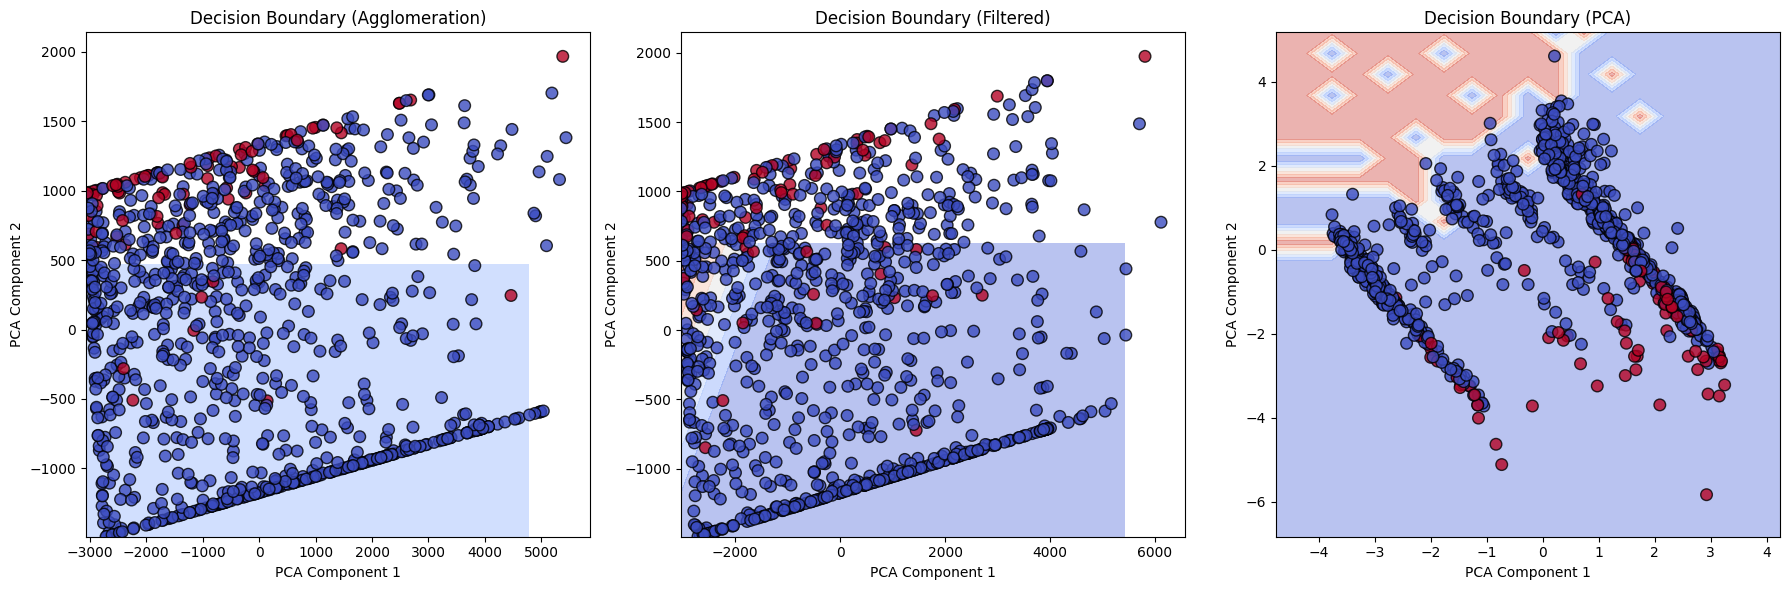

In [124]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Function to plot decision boundary with memory and visual improvements
# def plot_decision_boundary(X, y, model, title, step_size=0.5, subsample_size=1000, max_points=50000):
#     # Subsample the test data for visualization
#     if len(X) > subsample_size:
#         indices = np.random.choice(len(X), size=subsample_size, replace=False)
#         X = X[indices]
#         y = y.iloc[indices]

#     # Create a meshgrid for plotting decision boundaries
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size),
#                          np.arange(y_min, y_max, step_size))
    
#     # Limit the number of points in the meshgrid to reduce memory usage
#     num_points = xx.size
#     if num_points > max_points:  # Use max_points to limit grid size
#         factor = int(np.ceil(num_points / max_points))
#         xx = xx[::factor, ::factor]
#         yy = yy[::factor, ::factor]

#     # Predict on meshgrid points
#     Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)

#     # Plot decision boundary
#     plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')

#     # Scatter plot of the actual data points with improved visibility
#     plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=70, alpha=0.8, cmap='coolwarm')

#     plt.title(title)
#     plt.xlabel("PCA Component 1")
#     plt.ylabel("PCA Component 2")

# # Plot decision boundaries for each feature reduction method
# plt.figure(figsize=(18, 6))

# # 1. For df_reduced (with subsampling)
# plt.subplot(1, 3, 1)
# plot_decision_boundary(X_test_reduced_2d, y_test_reduced, rf_reduced_2d, "Decision Boundary (Agglomeration)", step_size=0.5, subsample_size=1000, max_points=30000)

# # 2. For filtered_df (with subsampling)
# plt.subplot(1, 3, 2)
# plot_decision_boundary(X_test_filtered_2d, y_test_filtered, rf_filtered_2d, "Decision Boundary (Filtered)", step_size=0.5, subsample_size=1000, max_points=30000)

# # 3. For df_pca (with subsampling)
# plt.subplot(1, 3, 3)
# plot_decision_boundary(X_test_pca_2d, y_test_pca, rf_pca_2d, "Decision Boundary (PCA)", step_size=0.5, subsample_size=1000, max_points=30000)

# plt.tight_layout()
# plt.show()


# Model Training (XgBoost)


In [126]:
# import xgboost as xgb
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.model_selection import GridSearchCV

# # Convert the DataFrames into DMatrix, which is optimized for XGBoost
# dtrain = xgb.DMatrix(df_reduced, label=df['target'])
# dtest = xgb.DMatrix(dt_reduced, label=dt['target'])

# # Set initial parameters for XGBoost
# xgb_params = {
#     'objective': 'binary:logistic',  # For binary classification
#     'eval_metric': 'logloss',  # Logarithmic loss as evaluation metric
#     'eta': 0.1,  # Learning rate
#     'max_depth': 6,  # Maximum depth of each tree
#     'subsample': 0.8,  # Subsample ratio of the training instances
#     'colsample_bytree': 0.8,  # Subsample ratio of columns when constructing each tree
#     'random_state': 42,
#     'n_jobs': -1  # Use all cores for parallelization
# }

# # Train the model
# bst = xgb.train(params=xgb_params, dtrain=dtrain, num_boost_round=100, evals=[(dtest, 'test')], early_stopping_rounds=10)

# # Make predictions on the test data
# y_pred_prob = bst.predict(dtest)
# y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to 0 or 1

# # Evaluation metrics
# accuracy = accuracy_score(dt['target'], y_pred)
# precision = precision_score(dt['target'], y_pred, average='binary')
# recall = recall_score(dt['target'], y_pred, average='binary')
# f1 = f1_score(dt['target'], y_pred, average='binary')

# # Print the results
# print(f"Accuracy: {accuracy:.4f}")
# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1 Score: {f1:.4f}")

# # Perform GridSearchCV to fine-tune parameters
# param_grid = {
#     'max_depth': [4, 6, 8],
#     'eta': [0.01, 0.1, 0.2],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
# }

# # GridSearchCV using cross-validation
# grid_search = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic', random_state=42),
#                            param_grid=param_grid,
#                            scoring='f1',
#                            cv=3,
#                            verbose=1,
#                            n_jobs=-1)

# # Fit the model
# grid_search.fit(df_reduced, df['target'])

# # Best parameters from GridSearch
# print(f"Best parameters: {grid_search.best_params_}")

# # Best estimator
# best_xgb_model = grid_search.best_estimator_

# # Make predictions using the best model
# y_pred_best = best_xgb_model.predict(dt_reduced)

# # Evaluation metrics for the best model
# accuracy_best = accuracy_score(dt['target'], y_pred_best)
# precision_best = precision_score(dt['target'], y_pred_best, average='binary')
# recall_best = recall_score(dt['target'], y_pred_best, average='binary')
# f1_best = f1_score(dt['target'], y_pred_best, average='binary')

# # Print the results for the best model
# print(f"Best Model Accuracy: {accuracy_best:.4f}")
# print(f"Best Model Precision: {precision_best:.4f}")
# print(f"Best Model Recall: {recall_best:.4f}")
# print(f"Best Model F1 Score: {f1_best:.4f}")


[0]	test-logloss:0.26943
[1]	test-logloss:0.23625
[2]	test-logloss:0.21039
[3]	test-logloss:0.18918
[4]	test-logloss:0.17169
[5]	test-logloss:0.15665
[6]	test-logloss:0.14381
[7]	test-logloss:0.13250
[8]	test-logloss:0.12260
[9]	test-logloss:0.11380
[10]	test-logloss:0.10630
[11]	test-logloss:0.10154
[12]	test-logloss:0.09740
[13]	test-logloss:0.09147
[14]	test-logloss:0.08623
[15]	test-logloss:0.08143
[16]	test-logloss:0.07728
[17]	test-logloss:0.07356
[18]	test-logloss:0.07131
[19]	test-logloss:0.06811
[20]	test-logloss:0.06658
[21]	test-logloss:0.06388
[22]	test-logloss:0.06143
[23]	test-logloss:0.05925
[24]	test-logloss:0.05725
[25]	test-logloss:0.05621
[26]	test-logloss:0.05536
[27]	test-logloss:0.05376
[28]	test-logloss:0.05230
[29]	test-logloss:0.05168
[30]	test-logloss:0.05050
[31]	test-logloss:0.05001
[32]	test-logloss:0.04961
[33]	test-logloss:0.04927
[34]	test-logloss:0.04845
[35]	test-logloss:0.04754
[36]	test-logloss:0.04660
[37]	test-logloss:0.04627
[38]	test-logloss:0.04

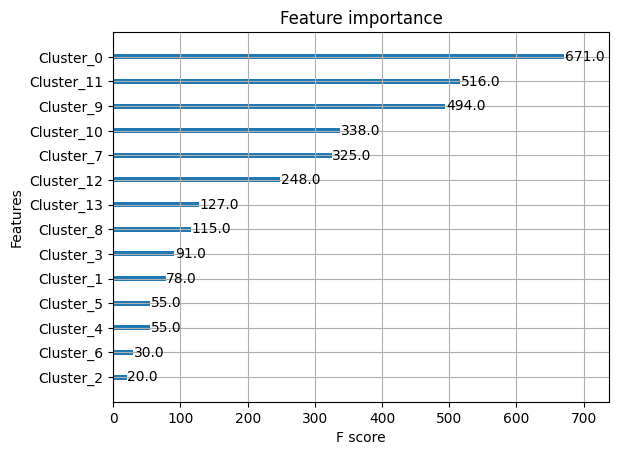

In [127]:
# import matplotlib.pyplot as plt
# import xgboost as xgb

# # Plot the feature importance
# xgb.plot_importance(bst)
# plt.show()


#### VISUALISATION OF XGBOOST USING SHAP


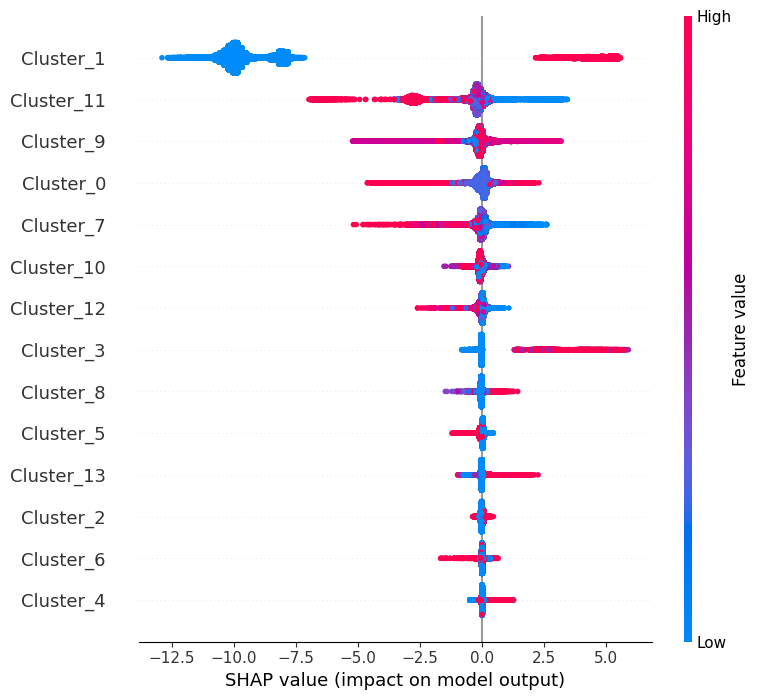

In [137]:
# import shap

# # Create a SHAP explainer
# explainer = shap.TreeExplainer(best_xgb_model)
# shap_values = explainer.shap_values(dt_reduced)

# # SHAP summary plot (global feature importance)
# shap.summary_plot(shap_values, dt_reduced)

# # SHAP force plot (individual prediction)
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0, :], dt_reduced.iloc[0, :])


# Model Traing (LightGBM)


[LightGBM] [Info] Number of positive: 60643, number of negative: 644081
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1738
[LightGBM] [Info] Number of data points in the train set: 704724, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.086052 -> initscore=-2.362820
[LightGBM] [Info] Start training from score -2.362820
Accuracy: 0.9819
Precision: 0.8816
Recall: 0.9150
F1 Score: 0.8980
AUC-ROC: 0.9969
Confusion Matrix:
[[211391   2504]
 [  1733  18647]]


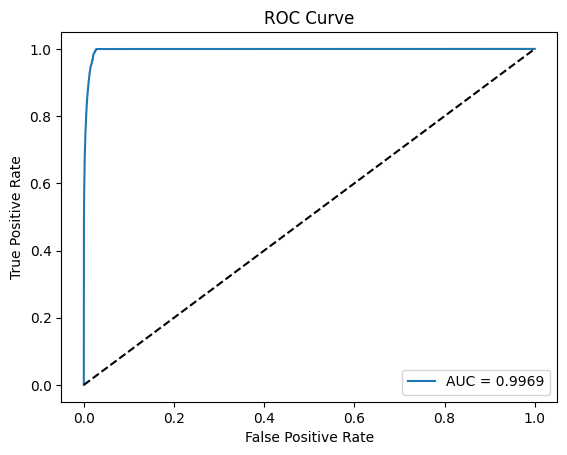

In [143]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Prepare datasets for LightGBM
dtrain = lgb.Dataset(df_reduced, label=df['target'])
dtest = lgb.Dataset(dt_reduced, label=dt['target'])

# Set LightGBM parameters
lgb_params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'learning_rate': 0.1,
    'max_depth': 6,
    'num_leaves': 32,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42,
    'n_jobs': -1
}

# Train the model without early stopping
bst = lgb.train(params=lgb_params,
                train_set=dtrain,
                num_boost_round=100)

# Make predictions on the test data using the model
y_pred_prob = bst.predict(dt_reduced)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluation metrics
accuracy = accuracy_score(dt['target'], y_pred)
precision = precision_score(dt['target'], y_pred, average='binary')
recall = recall_score(dt['target'], y_pred, average='binary')
f1 = f1_score(dt['target'], y_pred, average='binary')
auc = roc_auc_score(dt['target'], y_pred_prob)

# Confusion matrix
conf_matrix = confusion_matrix(dt['target'], y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {auc:.4f}")

# Plot the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# ROC Curve
fpr, tpr, thresholds = roc_curve(dt['target'], y_pred_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


[LightGBM] [Info] Number of positive: 60643, number of negative: 644081
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1738
[LightGBM] [Info] Number of data points in the train set: 704724, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.086052 -> initscore=-2.362820
[LightGBM] [Info] Start training from score -2.362820
Accuracy: 0.9819
Precision: 0.8816
Recall: 0.9150
F1 Score: 0.8980
AUC-ROC: 0.9969
Confusion Matrix:
[[211391   2504]
 [  1733  18647]]


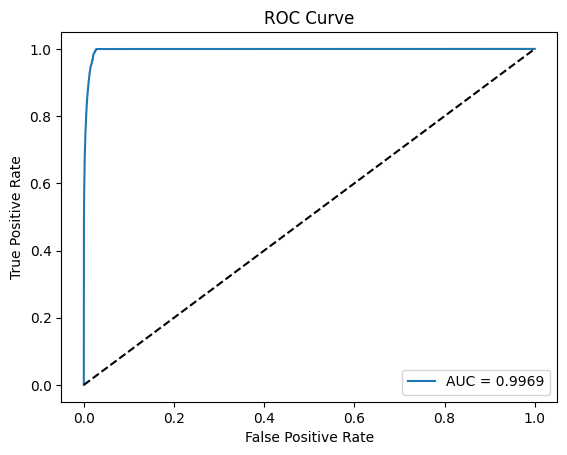

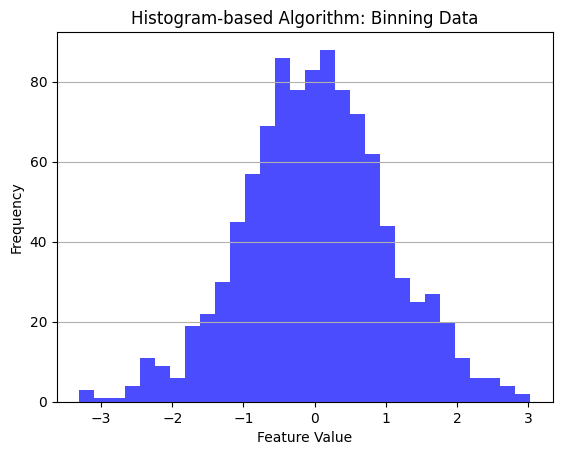

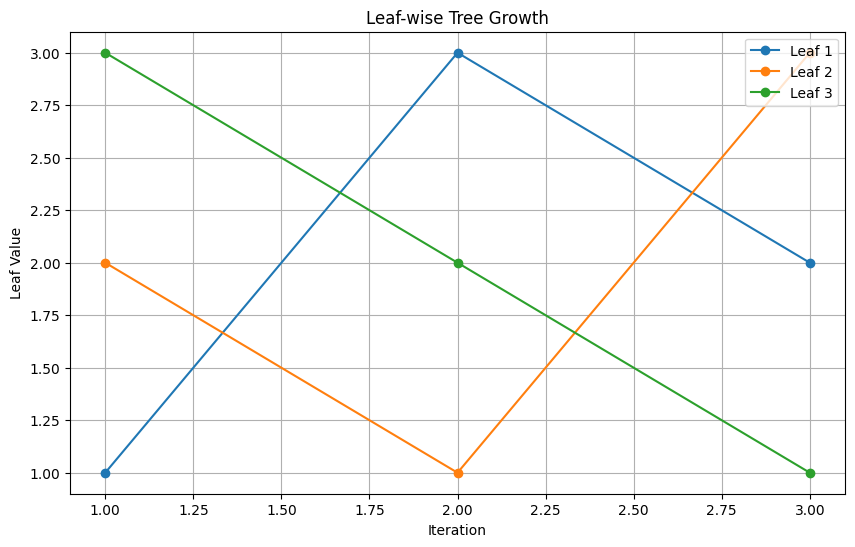

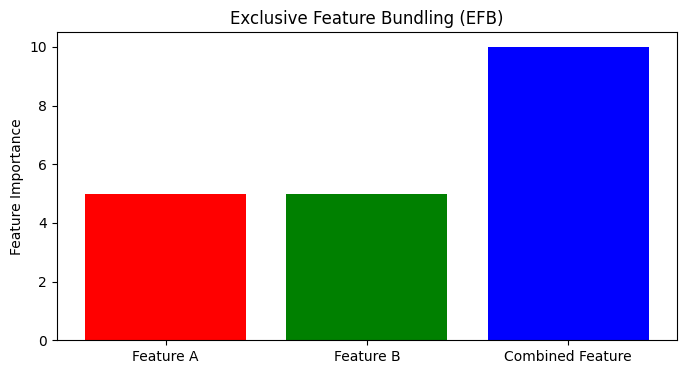

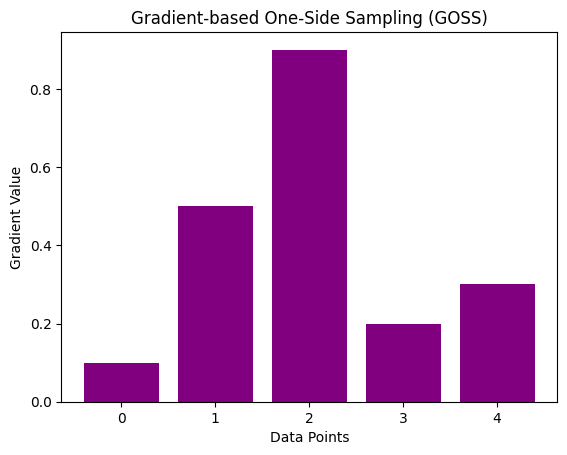

In [146]:
#VISUALISATION OF LIGHTGBM of all the major algos involved 

import lightgbm as lgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve

# Prepare datasets for LightGBM
dtrain = lgb.Dataset(df_reduced, label=df['target'])
dtest = lgb.Dataset(dt_reduced, label=dt['target'])

# Set LightGBM parameters
lgb_params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'learning_rate': 0.1,
    'max_depth': 6,
    'num_leaves': 32,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42,
    'n_jobs': -1
}

# Train the model without early stopping
bst = lgb.train(params=lgb_params,
                train_set=dtrain,
                num_boost_round=100)

# Make predictions on the test data using the model
y_pred_prob = bst.predict(dt_reduced)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluation metrics
accuracy = accuracy_score(dt['target'], y_pred)
precision = precision_score(dt['target'], y_pred, average='binary')
recall = recall_score(dt['target'], y_pred, average='binary')
f1 = f1_score(dt['target'], y_pred, average='binary')
auc = roc_auc_score(dt['target'], y_pred_prob)

# Confusion matrix
conf_matrix = confusion_matrix(dt['target'], y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {auc:.4f}")

# Plot the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# ROC Curve
fpr, tpr, thresholds = roc_curve(dt['target'], y_pred_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# --- Visualizing LightGBM Concepts ---

def plot_histogram_binning():
    data = np.random.randn(1000)
    plt.hist(data, bins=30, alpha=0.7, color='blue')
    plt.title('Histogram-based Algorithm: Binning Data')
    plt.xlabel('Feature Value')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

def plot_leaf_wise_growth():
    plt.figure(figsize=(10, 6))
    plt.plot([1, 2, 3], [1, 3, 2], label='Leaf 1', marker='o')
    plt.plot([1, 2, 3], [2, 1, 3], label='Leaf 2', marker='o')
    plt.plot([1, 2, 3], [3, 2, 1], label='Leaf 3', marker='o')
    plt.title('Leaf-wise Tree Growth')
    plt.xlabel('Iteration')
    plt.ylabel('Leaf Value')
    plt.legend()
    plt.grid()
    plt.show()

def plot_exclusive_feature_bundling():
    plt.figure(figsize=(8, 4))
    plt.bar(['Feature A', 'Feature B', 'Combined Feature'], [5, 5, 10], color=['red', 'green', 'blue'])
    plt.title('Exclusive Feature Bundling (EFB)')
    plt.ylabel('Feature Importance')
    plt.show()

def plot_gradient_based_sampling():
    gradients = np.array([0.1, 0.5, 0.9, 0.2, 0.3])
    plt.bar(range(len(gradients)), gradients, color='purple')
    plt.title('Gradient-based One-Side Sampling (GOSS)')
    plt.xlabel('Data Points')
    plt.ylabel('Gradient Value')
    plt.xticks(range(len(gradients)))
    plt.show()

# Plotting each concept
plot_histogram_binning()
plot_leaf_wise_growth()
plot_exclusive_feature_bundling()
plot_gradient_based_sampling()


# After looking at the respective evaluation metrics of all the models we have experimented with we decided to keep only the last model lightGBM for submission which has max score in all metrics , the rest of the models are commented to avoid any confusions and show how did we reach to this conclusion
